In [14]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import SimpleITK as sitk
import numpy as np

In [26]:
data_dir = Path("/mnt/data1/datasets/RadiomicsHub/Colorectal_Liver_Metastases/Colorectal-Liver-Metastases-November-2022-manifest/Colorectal-Liver-Metastases-processed")

In [27]:
clinical_df = pd.read_excel("/mnt/data1/datasets/RadiomicsHub/Colorectal_Liver_Metastases/Colorectal-Liver-Metastases-November-2022-manifest/Colorectal-Liver-Metastases-Clinical-data-April-2023.xlsx")

/home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [28]:
list(clinical_df.columns)

['Patient-ID',
 'De-identify Scout Name',
 'age',
 'sex',
 'major_comorbidity',
 'body_mass_index',
 'node_positive_primary',
 'synchronous_crlm',
 'multiple_metastases',
 'clinrisk_score',
 'clinrisk_stratified',
 'carcinoembryonic_antigen',
 'max_tumor_size',
 'bilobar_disease',
 'extrahep_disease',
 'chemo_before_liver_resection',
 'preoperative_pve',
 'steatosis_yesno',
 'presence_sinusoidal_dilata',
 'NASH_score',
 'NASH_yesno',
 'NASH_greater_4',
 'total_response_percent',
 'necrosis_percent',
 'fibrosis_percent',
 'fibrosis_greater_40_percent',
 'mucin_percent',
 'overall_survival_months',
 'vital_status',
 'progression_or_recurrence',
 'months_to_DFS_progression',
 'vital_status_DFS',
 'progression_or_recurrence_liveronly',
 'months_to_liver_DFS_progression',
 'vital_status_liver_DFS',
 'relevant_notes']

In [29]:
metadata_df = pd.read_csv("/mnt/data1/datasets/RadiomicsHub/Colorectal_Liver_Metastases/Colorectal-Liver-Metastases-November-2022-manifest/metadata.csv")

In [30]:
clinical_df

,Patient-ID,De-identify Scout Name,age,sex,major_comorbidity,body_mass_index,node_positive_primary,synchronous_crlm,multiple_metastases,clinrisk_score,...,mucin_percent,overall_survival_months,vital_status,progression_or_recurrence,months_to_DFS_progression,vital_status_DFS,progression_or_recurrence_liveronly,months_to_liver_DFS_progression,vital_status_liver_DFS,relevant_notes
0,CRLM-CT-1001,001_recurrence_preop,65,2,0,21.9,0,1,0,1,...,0.0,117.400000,0,0,117.400000,0,0,117.400000,0,NaN
1,CRLM-CT-1002,002_recurrence_preop,63,1,0,23.7,1,1,0,2,...,0.0,26.800000,1,1,13.800000,1,1,13.800000,1,NaN
2,CRLM-CT-1003,003_recurrence_preop,52,2,0,37.5,0,0,0,0,...,0.0,94.700000,0,0,94.700000,0,0,94.700000,0,NaN
3,CRLM-CT-1004,004_recurrence_preop,39,1,1,22.1,1,1,1,3,...,0.0,92.000000,0,0,92.000000,0,0,92.000000,0,NaN
4,CRLM-CT-1005,005_recurrence_preop,87,1,1,26.6,0,0,1,3,...,0.0,24.700000,0,0,24.700000,0,0,24.700000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,CRLM-CT-1194,326_recurrence_preop,59,2,1,21.6,0,1,0,2,...,0.3,25.066667,1,1,5.833333,1,1,19.300000,1,NaN
193,CRLM-CT-1195,327_recurrence_preop,40,2,1,30.3,0,1,1,1,...,0.0,91.833333,1,1,15.166667,1,1,32.933333,1,NaN
194,CRLM-CT-1196,333_recurrence_preop,42,1,1,28.1,0,0,1,2,...,-999.0,10.633333,0,1,3.166667,1,1,3.166667,1,NaN
195,CRLM-CT-1197,340_recurrence_preop,77,1,1,24.9,1,1,1,-999,...,-999.0,101.133333,1,1,54.066667,1,1,54.066667,1,NaN


In [31]:
df = pd.merge(metadata_df, clinical_df, left_on="Subject ID", right_on="Patient-ID", how="inner")

In [32]:
df["image_path"] = df["Series UID"].apply(lambda x: data_dir / x / "nifti" / "dicom.nii.gz" if (data_dir / x / "nifti"/ "dicom.nii.gz").exists() else None)
df["mask_path"] = df["Series UID"].apply(lambda x: list((data_dir / x / "nifti").glob("*-liverbreastcarcinoma.nii.gz")))

In [37]:
df.dropna(subset=["image_path", "mask_path"], inplace=True)

In [38]:
df

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,...,vital_status,progression_or_recurrence,months_to_DFS_progression,vital_status_DFS,progression_or_recurrence_liveronly,months_to_liver_DFS_progression,vital_status_liver_DFS,relevant_notes,image_path,mask_path
1,1.3.6.1.4.1.14519.5.2.1.9203.8273.533669585389...,Colorectal-Liver-Metastases,NO,https://doi.org/10.7937/QXK2-QG03,CRLM-CT-1001,1.3.6.1.4.1.14519.5.2.1.9203.8273.123231034424...,CT ANGIO ABD WITH PEL,06-06-1992,NaN,GE MEDICAL SYSTEMS,...,0,0,117.400000,0,0,117.400000,0,NaN,/mnt/data1/datasets/RadiomicsHub/Colorectal_Li...,[/mnt/data1/datasets/RadiomicsHub/Colorectal_L...
3,1.3.6.1.4.1.14519.5.2.1.9203.8273.455038217313...,Colorectal-Liver-Metastases,NO,https://doi.org/10.7937/QXK2-QG03,CRLM-CT-1002,1.3.6.1.4.1.14519.5.2.1.9203.8273.290195284494...,CT ANGIO ABD WITH CH AND PEL,07-12-1992,NaN,GE MEDICAL SYSTEMS,...,1,1,13.800000,1,1,13.800000,1,NaN,/mnt/data1/datasets/RadiomicsHub/Colorectal_Li...,[/mnt/data1/datasets/RadiomicsHub/Colorectal_L...
5,1.3.6.1.4.1.14519.5.2.1.9203.8273.647078994044...,Colorectal-Liver-Metastases,NO,https://doi.org/10.7937/QXK2-QG03,CRLM-CT-1007,1.3.6.1.4.1.14519.5.2.1.9203.8273.162042703840...,CT CHABDPEL W CONTRAST,12-29-1994,CT CHABPEL,GE MEDICAL SYSTEMS,...,0,0,93.600000,0,0,93.600000,0,NaN,/mnt/data1/datasets/RadiomicsHub/Colorectal_Li...,[/mnt/data1/datasets/RadiomicsHub/Colorectal_L...
7,1.3.6.1.4.1.14519.5.2.1.9203.8273.147176332383...,Colorectal-Liver-Metastases,NO,https://doi.org/10.7937/QXK2-QG03,CRLM-CT-1008,1.3.6.1.4.1.14519.5.2.1.9203.8273.313180638648...,CT ANGIO ABD WITH PEL,01-30-1995,Bind170954277..465,GE MEDICAL SYSTEMS,...,1,1,10.000000,1,0,39.833333,1,NaN,/mnt/data1/datasets/RadiomicsHub/Colorectal_Li...,[/mnt/data1/datasets/RadiomicsHub/Colorectal_L...
9,1.3.6.1.4.1.14519.5.2.1.9203.8273.998520027522...,Colorectal-Liver-Metastases,NO,https://doi.org/10.7937/QXK2-QG03,CRLM-CT-1003,1.3.6.1.4.1.14519.5.2.1.9203.8273.271600479651...,CT ANGIO LIVER WITH CHPEL,09-24-1994,NaN,GE MEDICAL SYSTEMS,...,0,0,94.700000,0,0,94.700000,0,NaN,/mnt/data1/datasets/RadiomicsHub/Colorectal_Li...,[/mnt/data1/datasets/RadiomicsHub/Colorectal_L...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,1.3.6.1.4.1.14519.5.2.1.9203.8273.143580197834...,Colorectal-Liver-Metastases,NO,https://doi.org/10.7937/QXK2-QG03,CRLM-CT-1194,1.3.6.1.4.1.14519.5.2.1.9203.8273.191686961455...,CT CHABDPEL W CONTRAST,09-15-1993,NaN,GE MEDICAL SYSTEMS,...,1,1,5.833333,1,1,19.300000,1,NaN,/mnt/data1/datasets/RadiomicsHub/Colorectal_Li...,[/mnt/data1/datasets/RadiomicsHub/Colorectal_L...
387,1.3.6.1.4.1.14519.5.2.1.9203.8273.289477687632...,Colorectal-Liver-Metastases,NO,https://doi.org/10.7937/QXK2-QG03,CRLM-CT-1192,1.3.6.1.4.1.14519.5.2.1.9203.8273.113947602750...,CT ABPEL W CONTRAST,04-12-1992,NaN,GE MEDICAL SYSTEMS,...,1,1,36.100000,1,1,36.100000,1,NaN,/mnt/data1/datasets/RadiomicsHub/Colorectal_Li...,[/mnt/data1/datasets/RadiomicsHub/Colorectal_L...
389,1.3.6.1.4.1.14519.5.2.1.9203.8273.183569989717...,Colorectal-Liver-Metastases,NO,https://doi.org/10.7937/QXK2-QG03,CRLM-CT-1196,1.3.6.1.4.1.14519.5.2.1.9203.8273.599636104674...,CT ANGIO ABD WITH CH AND PEL,08-20-1994,NaN,GE MEDICAL SYSTEMS,...,0,1,3.166667,1,1,3.166667,1,NaN,/mnt/data1/datasets/RadiomicsHub/Colorectal_Li...,[/mnt/data1/datasets/RadiomicsHub/Colorectal_L...
391,1.3.6.1.4.1.14519.5.2.1.9203.8273.277480301357...,Colorectal-Liver-Metastases,NO,https://doi.org/10.7937/QXK2-QG03,CRLM-CT-1197,1.3.6.1.4.1.14519.5.2.1.9203.8273.114554175898...,CT ANGIO ABD WITH CH AND PEL,10-26-1991,NaN,GE MEDICAL SYSTEMS,...,1,1,54.066667,1,1,54.066667,1,NaN,/mnt/data1/datasets/RadiomicsHub/Colorectal_Li...,[/mnt/data1/datasets/RadiomicsHub/Colorectal_L...


In [53]:
row_list = []
for idx, row in tqdm(df.iterrows(), total=len(df)):
    image_path = row["image_path"]
    mask_paths = row["mask_path"]

    image = sitk.ReadImage(str(image_path))
    # Get sizes of all masks
    mask_sizes = []
    for i, mask_path in enumerate(mask_paths):
        mask = sitk.ReadImage(str(mask_path))
        mask_array = sitk.GetArrayFromImage(mask)
        mask_sizes.append((i, np.count_nonzero(mask_array)))
    
    # Get index of largest mask
    largest_mask_idx = max(mask_sizes, key=lambda x: x[1])[0]
    mask = sitk.ReadImage(str(mask_paths[largest_mask_idx]))

    # Get largest connected component from mask
    cc_filter = sitk.ConnectedComponentImageFilter()
    cc_filter.SetFullyConnected(True)
    cc_image = cc_filter.Execute(mask)
    
    # Get component sizes and find largest
    label_shape_filter = sitk.LabelShapeStatisticsImageFilter()
    label_shape_filter.Execute(cc_image)
    largest_label = max(range(1, cc_filter.GetObjectCount() + 1),
                       key=lambda x: label_shape_filter.GetPhysicalSize(x))
    
    # Get centroid of largest component
    centroid = label_shape_filter.GetCentroid(largest_label)
    x, y, z = centroid

    # Create a new dictionary with coordinates
    row_dict = row.to_dict()
    row_dict.update({
        "coordX": x,
        "coordY": y,
        "coordZ": z,
    })


    row_list.append(row_dict)



100%|██████████| 197/197 [01:26<00:00,  2.27it/s]


In [54]:
df = pd.DataFrame(row_list)
df.to_csv("data.csv", index=False)

In [55]:
df["coordY"]

0     -35.456682
1      -8.525729
2     -86.204805
3      26.886326
4     -77.362959
         ...    
192   -35.508458
193    -0.312235
194   -45.229614
195     4.833618
196   -34.519824
Name: coordY, Length: 197, dtype: float64

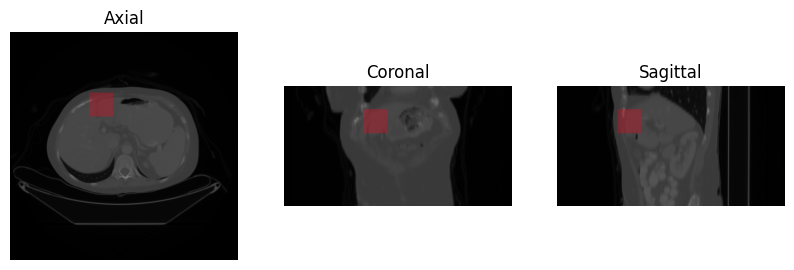

In [58]:
from fmcib.visualization import visualize_seed_point
visualize_seed_point(df.iloc[2])